<a href="https://colab.research.google.com/github/Kashishsingh-26/Module9_Lab3/blob/main/Mod9_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 9: Neural Networks

Lab 2: Using MLP for multiclass classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

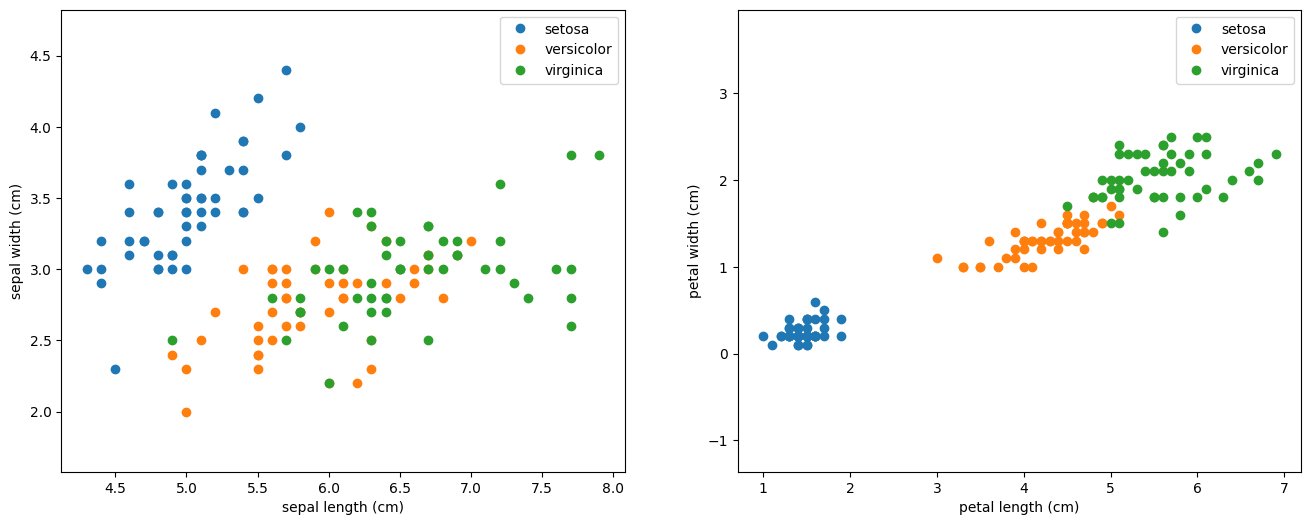

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 225.95it/s]


Plot training progress

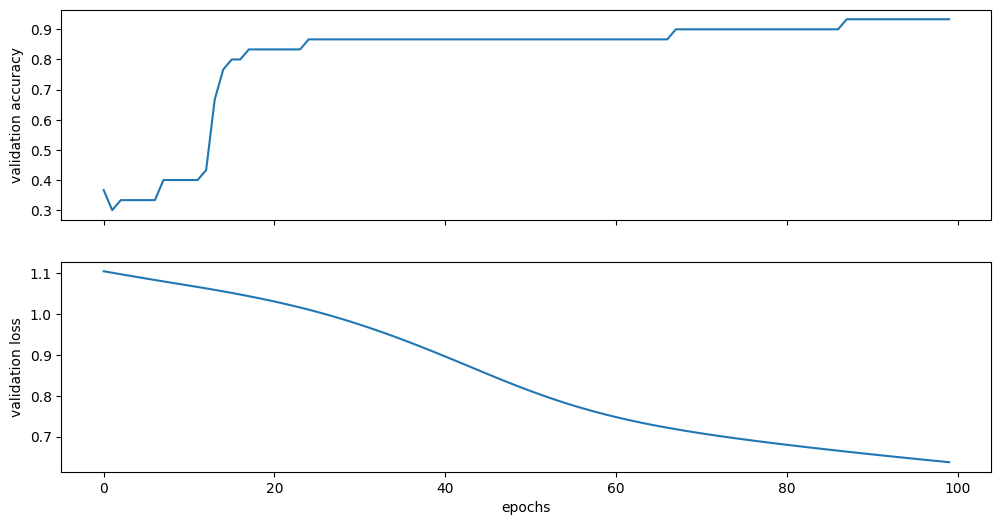

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

Experiment with the neural network architecture

1)Try changing the number of hidden layers.

2)Try changing the number of neurons in the hidden layer.

3)Try using a different activation function. Can you observe any changes?

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, activations
from tensorflow.keras.datasets import mnist

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Base Model
def create_base_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Experiment 1: Change the number of hidden layers
def create_model_exp1(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Experiment 2: Change the number of neurons in the hidden layer
def create_model_exp2(num_neurons):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(num_neurons, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Experiment 3: Use a different activation function
def create_model_exp3(activation_func):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_func),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate a given model
def train_and_evaluate(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Base Model
print("Base Model:")
base_model = create_base_model()
train_and_evaluate(base_model)

# Experiment 1: Change the number of hidden layers
print("\nExperiment 1: Change the number of hidden layers")
for num_hidden_layers in [1, 2, 3]:
    print(f"\nNumber of hidden layers: {num_hidden_layers}")
    model_exp1 = create_model_exp1(num_hidden_layers)
    train_and_evaluate(model_exp1)

# Experiment 2: Change the number of neurons in the hidden layer
print("\nExperiment 2: Change the number of neurons in the hidden layer")
for num_neurons in [64, 128, 256]:
    print(f"\nNumber of neurons in the hidden layer: {num_neurons}")
    model_exp2 = create_model_exp2(num_neurons)
    train_and_evaluate(model_exp2)

# Experiment 3: Use a different activation function
print("\nExperiment 3: Use a different activation function")
activation_functions = ['relu', 'tanh', 'sigmoid']
for activation_func in activation_functions:
    print(f"\nActivation function: {activation_func}")
    model_exp3 = create_model_exp3(activation_func)
    train_and_evaluate(model_exp3)

11490434/11490434 [==============================] - 1s 0us/step
Base Model:
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2615 - accuracy: 0.9250 - val_loss: 0.1298 - val_accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1139 - accuracy: 0.9666 - val_loss: 0.0948 - val_accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0934 - val_accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0805 - val_accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0779 - val_accuracy: 0.9758

Experiment 1: Change the number of hidden layers

Number of hidden layers: 1
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2626 - accuracy: 0.9255 - val_loss: 0.1495 - val_ac